<span style="color:#195879">

## 🚀😎 Minimum Viable Data Enthusiast
</span>

<span style="font-size:14.0pt">
<strong>Author:</strong></span> <span style="font-size:13.0pt">Manfredo E. Aceituno</span><br>
<span style="font-size:14.0pt"><strong>Date:</strong></span> <span style="font-size:13.0pt">June, 2024</span><br>
<span style="font-size:14.0pt"><strong>Programming language:</strong></span> <span style="font-size:13.0pt">Python</span>

<span></span>  
<span style="font-size:12.0pt">Nothing is perfect, so please [contact me](http://www.linkedin.com/in/manfredo-aceituno-perez) for any feedback or suggestions for improvement.</span> 

<span style="font-size:13.0pt">
<span style="color:red">

## **Netflix** 
</span>
</span>

#### **`Films and Series - Data analysis`**

> 🖥️ **The following Notebook** shows the Data Analysis Exploration (EDA) process, as well as the results and insights that could be obtained from the **[Netflix Movies and TV Shows dataset](https://github.com/viable-data-analyst/EntryLevel_DataAnalysis/blob/ded29c6f89ff106a3e402f7dc34d636ad2d1ebc6/0_Netflix_DataMunging.ipynb)** which contains information about the content available on the platform until the third quarter of 2021. The goal is to gain insights into the data and answer interesting questions about the types of movies and TV shows available on Netflix, their ratings, genres, and other relevant attributes.

<a id="table_content"></a>
## Table of Contents

1. [Analysis Overview](#Intro)
2. [Libraries](#Library)
3. [Importing Datasets](#Datasets)
4. [Additional transformations](#Transformation)
5. [Visualization prep and Insights pipeline code](#Vis)  
   5.1 [Yearly films available](#Fig1)  
   5.2 [Films released by country](#Fig2)  
   5.3 [Films' time duration by rating](#Fig3)  
   5.4 [Films' age distribution](#Fig4)  
   5.5 [Movies' description Wordcloud analysis](#Fig5)  
   5.6 [Films themes geographic distribution by Country of origin](#Fig6)
7. [Films' duration by genre](#Fig7)

<a id="Intro"> <a/>
## 1. Analysis overview
>After covering the initial data import and any necessary transformations, the focus shifts to visualizing and discover trends in the yearly availability of films, explore the origin countries of these movies, and analyze how duration relates to film rating. Additionally, we'll examine the age distribution of the movies and use word clouds to visualize the keywords used in the content descriptions. Finally, the analysis will explore the geographic distribution of film themes based on their country of origin.

[Return to: Table of contents](#table_content)

<a id="Library"></a>
## 2. Libraries

[Return to: Table of contents](#table_content)

In [1]:
import pandas as pd
import plotly.express as px
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='ggplot',offline=True)

<a id="Datasets"></a>
## 3. Importing Datasets to DataFrames

[Return to: Table of contents](#table_content)

In [2]:
df_netflix_movies = pd.read_csv('netflix_ready_file.csv', index_col=0)
df_netflix_genres = pd.read_csv('netflix_categories_matrix.csv')

<a id="Transformation"></a>
## 4. Transforming data types

[Return to: Table of contents](#table_content)

In [3]:
# Transforming integer values "df_netflix_movies" Dataframe
df_netflix_movies[['release_year','duration_value']] = (df_netflix_movies[['release_year','duration_value']]).apply(pd.to_numeric, 
                                                                     errors = 'coerce')

df_netflix_genres['duration_value'] = (df_netflix_genres['duration_value']).apply(pd.to_numeric,
                                                                                 errors = 'coerce')

In [4]:
# Transforming integer values "df_netflix_movies" Dataframe
df_netflix_movies['date_added'] = pd.to_datetime(df_netflix_movies['date_added'], format='%Y-%m-%d',
                                                errors ='coerce')

# Transforming integer values "df_netflix_genres" Dataframe
df_netflix_genres['date_added'] = pd.to_datetime(df_netflix_genres['date_added'], format = '%Y-%m-%d',
                                                errors = 'coerce')

In [5]:
# Revisando que las transformaciones en tipo de datos se hayan hecho
print('Summary of the variables types for "df_netflix_movies" DataFrame') 
print(f'{df_netflix_movies.dtypes.head(7)}\n')

print('Summary of the variables types for "df_netflix_genres" DataFrame')
print(f'{df_netflix_genres.dtypes.head(7)}')

Summary of the variables types for "df_netflix_movies" DataFrame
type                    object
title                   object
director                object
cast                    object
country                 object
release_year             int64
date_added      datetime64[ns]
dtype: object

Summary of the variables types for "df_netflix_genres" DataFrame
title                         object
type                          object
date_added            datetime64[ns]
country                       object
release_year                   int64
rating                        object
rating_description            object
dtype: object


<a id="Vis"></a>
## 5. Visualization, Insights pipeline & code

[Return to: Table of contents](#table_content)

In [6]:
df_netflix_movies.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'date_added', 'rating', 'rating_description', 'duration',
       'duration_value', 'duration_time_unit', 'genre', 'description'],
      dtype='object')

In [7]:
# Filtering Movies y TV Show
netflix_movies_filtered = df_netflix_movies.loc[
(df_netflix_movies["cast"] != "no_cast") & (df_netflix_movies["date_added"] != "no_date") & (df_netflix_movies["director"] != "no_director") &
(df_netflix_movies["country"] != "no_country") & ((df_netflix_movies["type"] == "Movie") | (df_netflix_movies["type"] == "TV Show")) &
(df_netflix_movies["rating_description"] != "no_rating")]

In [8]:
# Year to int and NaN to 0
netflix_movies_filtered["year_added"] = netflix_movies_filtered["date_added"].dt.year.fillna(0).astype("int64")

In [9]:
netflix_movies_filtered[:2]

,type,title,director,cast,country,release_year,date_added,rating,rating_description,duration,duration_value,duration_time_unit,genre,description,year_added
show_id,,,,,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,2021-09-24,TV-MA,Mature audiences,125 min,125.0,min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,2021-09-24,TV-14,Parents cautioned,9 Seasons,9.0,Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021


<a id="Fig1"></a>
### 5.1 Yearly films available on Netflix

<span style="font-size:12.5pt">
</span>

[Return to: Table of contents](#table_content)

In [10]:
grouped_type_movies = netflix_movies_filtered.groupby(["year_added","type"]).size().reset_index(name="count")

In [11]:
grouped_type_movies = grouped_type_movies.sort_values(by=["year_added","count"], ascending=[False, False])[["year_added", "type", 
                                                                           "count"]]

In [12]:
grouped_type_movies[:6]

,year_added,type,count
20,2021,Movie,729
21,2021,TV Show,26
18,2020,Movie,1151
19,2020,TV Show,43
16,2019,Movie,1236
17,2019,TV Show,29


In [13]:
# Parameters for the first insight visualization bar graph
fig1 = px.bar(grouped_type_movies, x = "year_added", y="count", color="type",
              barmode="group", height=500,
              title = "Netflix yearly films available",
              labels={"year_added":"Year", "count":"No. of films available", "type":"Films' type"}
             )

<span style="color:#7635A2">

## Visualization analysis
</span>
> The graph shows an interesting trend in the availability of movies and series on Netflix over the years. A constant increase is observed in the number of available movies until reaching a peak in 2018, followed by a slight decrease in 2019 and 2020. On the other hand, the availability of series experiences constant growth throughout the entire period, with a notable peak in 2020.  

> #### **`Assumptions`**
> * The increase in movie availability through 2018 could be related to Netflix's strategy of investing in the production of original content, especially big budget films.
> * The decline in movie availability from 2018 could be due to several factors, including rising production costs, competition from other streaming platforms, and a change in Netflix's content strategy.
> * The slight drop from the peak in 2020 could be related to the COVID-19 pandemic, which led Netflix to reduce series production, and release content that it had [already pre-recorded TV Shows](https://netflix.fandom.com/wiki/Netflix_Original#:~:text=The%20first%20Netflix%20commissioned%20programme,Orange%20Is%20the%20New%20Black.) as people spent more time at home and consuming more content online streaming.

[Return to: Table of contents](#table_content)

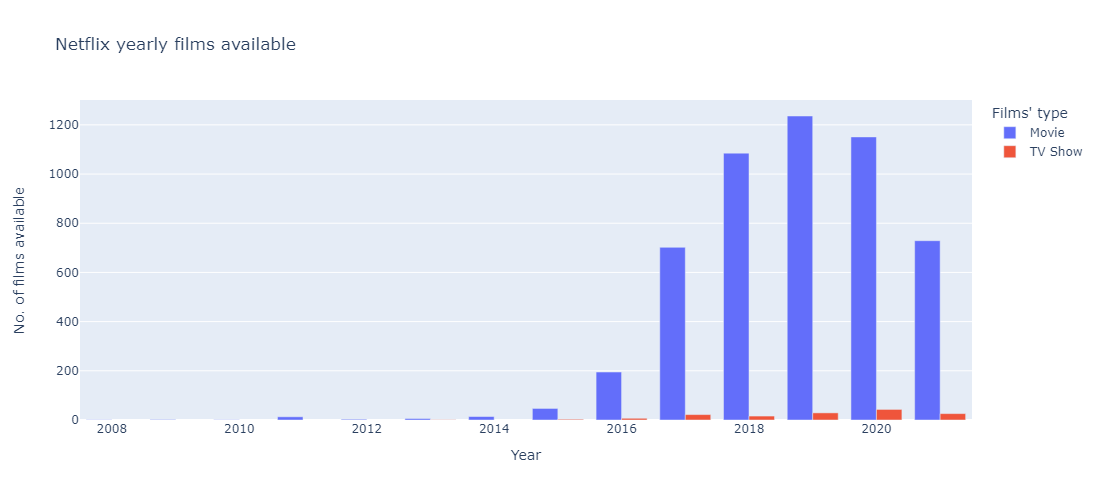

In [14]:
fig1

<a id="Fig2"></a>
### 5.2 Film ratings' distribution released by Country
[Return to: Table of contents](#table_content)

In [15]:
# Filter for second insight visualization Ratings by country in a treemap
grouped_netflix_rating = netflix_movies_filtered.groupby(['country','rating_description']).size().reset_index(name='count')
grouped_netflix_rating = grouped_netflix_rating.loc[grouped_netflix_rating["count"] >= 25]

In [16]:
# Dropping "country" rows that contain more than one country in the same row.
grouped_netflix_rating = grouped_netflix_rating[~grouped_netflix_rating['country'].str.contains(',')]

In [17]:
# Parameters for the second insight visualization Treemap graph
fig2 = px.treemap(grouped_netflix_rating, path=["rating_description", "country"], values = "count",
                  color="rating_description",
                 title = "Film ratings' distribution released by Country",
                  labels={"parent":"Rating", "labels":"Label", "count":"No. of films"}) 

<span style="color:#7635A2">

## Visualization analysis
</span>

> Analysis of the distribution of Netflix movie ratings by country of origin reveals interesting patterns in content production by age rating. Movies and TV shows with a `"Mature Audience"` rating are predominant in countries such as the United States, India, the United Kingdom, Spain, Turkey, and France. This could suggest a greater preference for mature content in these regions or greater investment in its production.

> On the other hand, content with a `"Parents caution"` rating is primarily concentrated in India and the United States. This trend could indicate a greater sensitivity towards topics that require caution for children in these countries or greater production of content aimed at this specific audience.

> It is important to note that Netflix's `"Restricted (+17)"` and `"Teen"` categories are mainly produced in the United States. This could suggest tighter restrictions on the production of content for these age categories in other countries or greater demand for this type of content in the US market.

[Return to: Table of contents](#table_content)

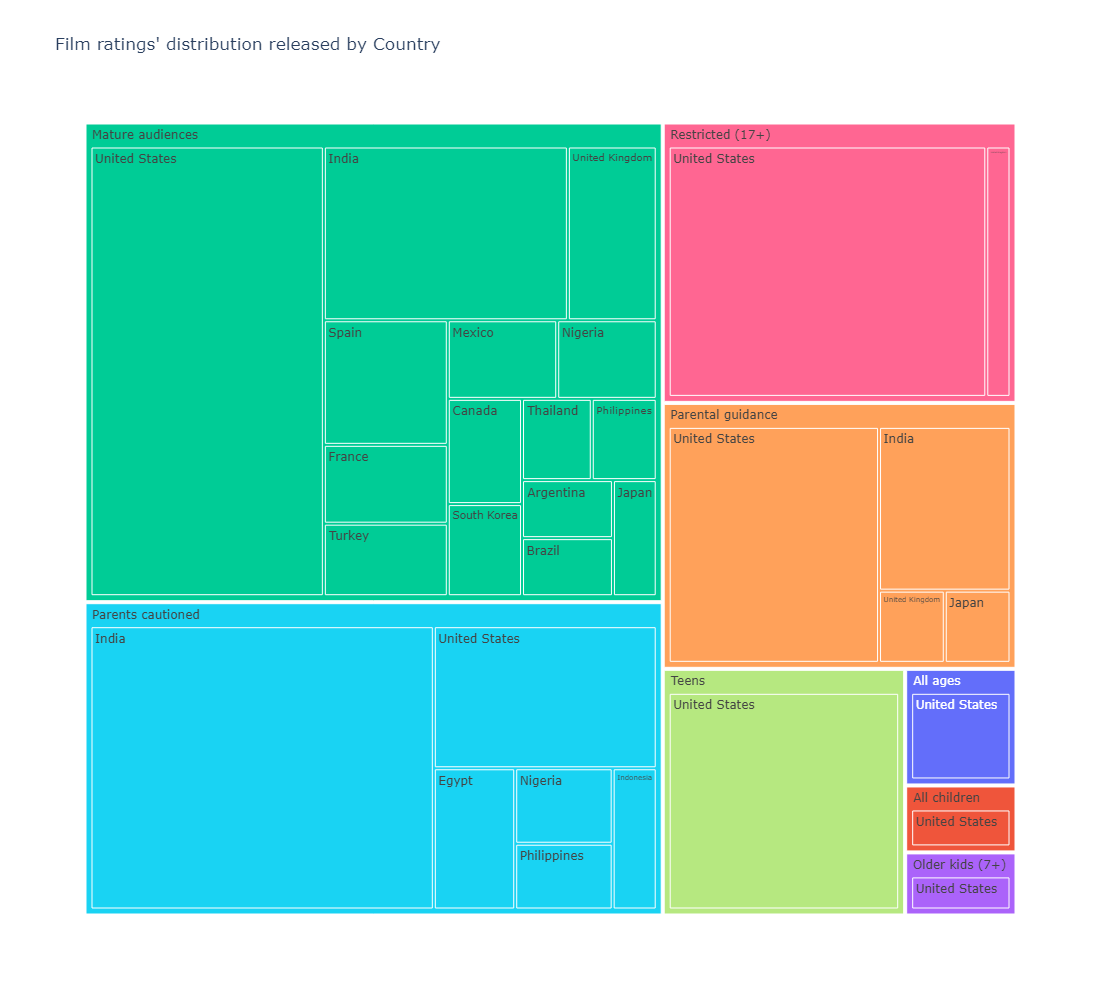

In [18]:
fig2.update_layout(height=1000)

<a id="Fig3"></a>
### 5.3 Films' duration by rating

[Return to: Table of contents](#table_content)

In [19]:
# Filtering films with duration in "min"
netflix_movies_filtered_min = netflix_movies_filtered.loc[netflix_movies_filtered["duration_time_unit"] == "min"]

In [20]:
# Average duration_value by film's rating
netflix_av_duration = netflix_movies_filtered_min.groupby("rating_description") ["duration_value"].mean().round(0).reset_index()

In [21]:
netflix_av_duration = netflix_av_duration.sort_values(by=["duration_value"],ascending=False)
netflix_av_duration[:5]

,rating_description,duration_value
0,Adults Only,146.0
8,Parents cautioned,114.0
10,Teens,109.0
9,Restricted (17+),107.0
11,Unrated,106.0


In [22]:
fig3 = px.bar(netflix_av_duration, x = "rating_description", y = "duration_value",
             color = "duration_value",
             title = "Avg. films' duration by ratings",
             labels={"rating_description":"Rating description", "duration_value":"Avg duration (min)"}
             )

<span style="color:#7635A2">

## Visualization analysis
</span>

>⏱️The average length of movies by age rating reveals an interesting trend in which movies with adult ratings `"Adults Only," "Parents Caution," "Teen," and "Restricted (17+)"` have a **longer average runtime than** movies with children's ratings `"All the Kids" and "Older Kids (+7)"`.

> **🍿This difference in duration could be attributed to several factors:**
>* `Adult rated` films can address more complex themes and narratives that require more time to develop in depth, while `kids-rated` movies may be designed to hold the attention of younger viewers for a shorter period of time.

[Return to: Table of contents](#table_content)

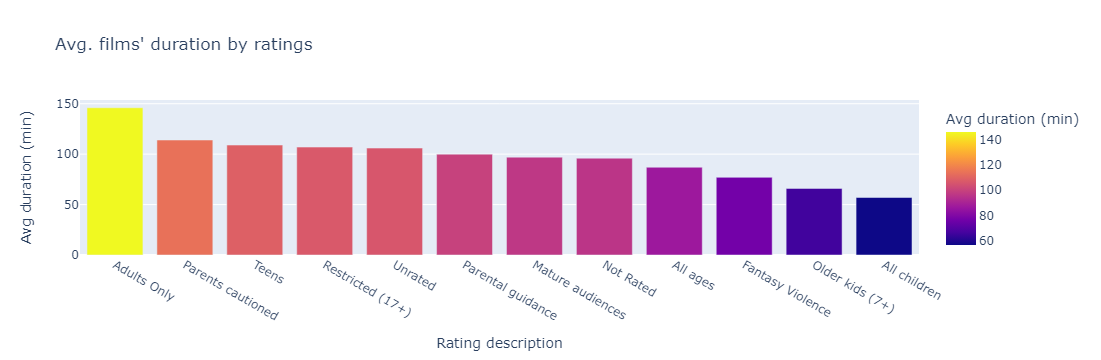

In [23]:
fig3

<a id="Fig4"></a>
### 5.4 Selection available: Films released from 1942 to 2021

[Return to: Table of contents](#table_content)

<span style="color:#7635A2">

## Visualization analysis
</span>

>Netflix offers a wide range of films from various eras, **with a notable concentration** observed `in films released in 2015, 2017 and 2020.`📺

>📈The dominant presence of 2015 films could suggest a strategic approach by Netflix to acquire and license relatively new films that are still relevant to today's audience.

>On the other hand, the **prominent presence of films from 2017 and 2020** `could indicate a greater emphasis on acquiring newer films` that reflect current trends and satisfy the preferences of viewers looking for new and engaging content.

>🎞️The **distribution of films** by release year on Netflix `reflects a combination of classic and new content acquisition strategies, attracting a wide audience.

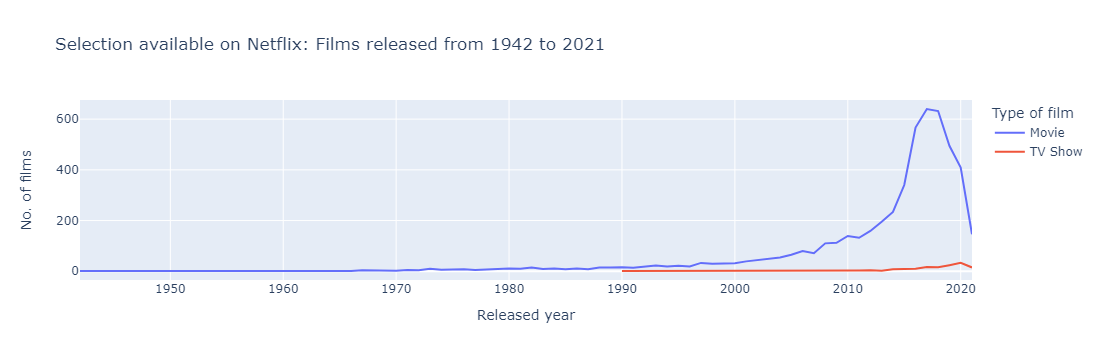

In [24]:
 netflix_by_year_type = netflix_movies_filtered.groupby(['release_year', 'type']).size().reset_index(name='count')

# Graph
fig4 = px.line(netflix_by_year_type, x='release_year', y='count', color='type',
               title='Selection available on Netflix: Films released from 1942 to 2021',
               labels={'release_year': 'Released year', 'count': 'No. of films', 'type': 'Type of film'})
fig4.show()

<a id="Fig5"></a>
### 5.5 Wordcloud: Movie descriptions' analysis

[Return to: Table of contents](#table_content)

<span style="color:#7635A2">

## Visualization analysis
</span>

>📑The most repeated words in the descriptions of the content available on Netflix until 2021 reveal common themes and elements that characterize the films on the platform. **Words such as** `"find", "family", “life", "love", "woman", "man", and "young", stand out.`".

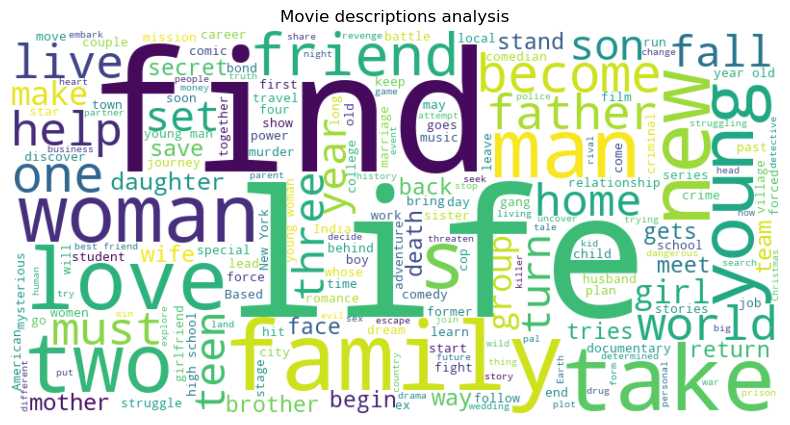

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = ["join", "go", "S", "s", "will", "gets", "back", "end"]  # List of words/letters to exclude
text = ' '.join(description for description in netflix_movies_filtered.description.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Movie descriptions analysis")
plt.show()

<a id="Fig6"></a>
### 5.6 Films geographic distribution of Keywords by Country of origin

[Return to: Table of contents](#table_content)

In [26]:
# Creating subsets with the frequent_descriptions of the list
frequent_descriptions = ["family", "love", "life", "man", "woman", "young"]
filtered_movies = []

for word in frequent_descriptions:
    filtered_movies.append(
        netflix_movies_filtered[netflix_movies_filtered["description"].str.contains(word, case=False)].assign(keyword=word))

filtered_movies_df = pd.concat(filtered_movies)

In [27]:
# Dropping "country" rows that contain more than one country in the same row.
filtered_movies_df = filtered_movies_df[~filtered_movies_df['country'].str.contains(',')]

# Pivot table
pivot_frequent_descriptions = filtered_movies_df.pivot_table(index=['year_added', 'country'], columns='keyword',
    values='title', aggfunc='count', fill_value=0).reset_index()

pivot_frequent_descriptions[:7] # Preview of the first seven rows.

keyword,year_added,country,family,life,love,man,woman,young
0,2009,Denmark,1,0,0,1,1,1
1,2009,United States,0,1,0,0,0,0
2,2011,United States,1,1,0,2,0,0
3,2012,United States,1,0,0,0,0,0
4,2013,United States,0,1,1,0,0,0
5,2014,United States,0,0,0,2,0,0
6,2015,Nigeria,0,0,1,0,0,0


In [28]:
long_format = pivot_frequent_descriptions.melt(id_vars=['year_added', 'country'], 
                               value_vars=frequent_descriptions, 
                               var_name='keyword', 
                               value_name='count')

# Showing a sample of the transformed DataFrame
long_format.head()

,year_added,country,keyword,count
0,2009,Denmark,family,1
1,2009,United States,family,0
2,2011,United States,family,1
3,2012,United States,family,1
4,2013,United States,family,0


<span style="color:#7635A2">

## Visualization analysis
</span>

>📊If we could extrapolate the findings with some basic user data, keyword analysis would give us relevant information by gender, age categories, apart from geographic regions to identify more specific patterns of content.

>However, the **visualization below** reveals interesting patterns in the production of film content that potentially reflect cultural and thematic preferences by region🌎.

>**Further suggestions**  
>`Keyword analysis` could be complemented by an examination of directors, actors and other creative elements to better understand the roots of thematic trends.

>🌏`Netflix could use these findings` to optimize its content acquisition strategies and personalized recommendations for users in different regions.
>
>[Return to: Table of contents](#table_content)

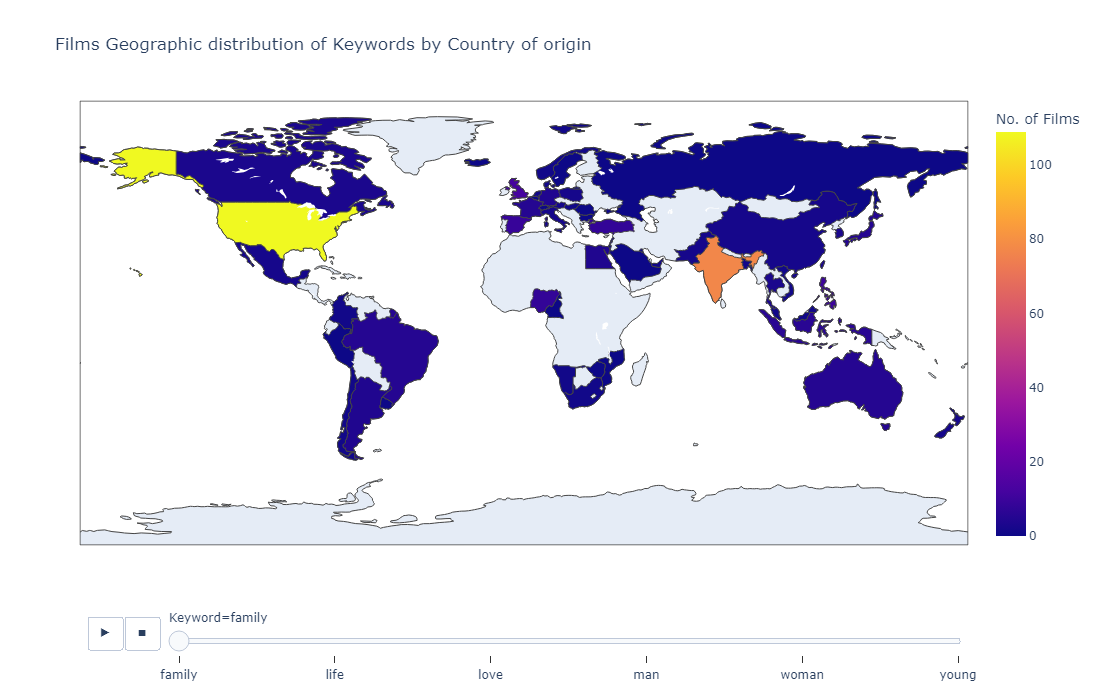

In [29]:
map_data = long_format.groupby(['country', 'keyword']).agg({'count': 'sum'}).reset_index()

fig6 = px.choropleth(map_data,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    animation_frame="keyword",
                    title="Films Geographic distribution of Keywords by Country of origin",
                    width=800, height=700,
                    labels={'count': 'No. of Films', 'keyword': 'Keyword'})

# Showing the graph
fig6.show()

<a id="Fig7"></a>
## 6. Films' duration by genre

[Return to: Table of contents](#table_content)

In [30]:
# Standardizing "duration_time_unit" for "Seasons" to "Season"
df_netflix_genres['duration_time_unit'] = df_netflix_genres['duration_time_unit'].str.replace('Seasons', 'Season')

In [31]:
# Create a subset of the DataFrame containing only the 'genres' and 'duration_value' columns
genres_columns = df_netflix_genres.columns[10:]

# Filter to eliminate the string "Seasons" from "duration_time_unit"
df_netflix_genres_no_unit = df_netflix_genres["duration_time_unit"] != "no_unit"

df_genres_duration = df_netflix_genres.loc[(df_netflix_genres["duration_time_unit"] != "Season") & (df_netflix_genres_no_unit)]

In [32]:
df_genres_duration = df_genres_duration[['duration_value'] + list(genres_columns)]

# Convert to long format
df_genres_duration_long = df_genres_duration.melt(id_vars=['duration_value'], 
                                                  var_name='genre', 
                                                  value_name='count')

# Filter only "genres" that are present
df_genres_duration_long = df_genres_duration_long[df_genres_duration_long['count'] == 1]

In [33]:
# Creating a "box plot" visualization
fig7 = px.box(df_genres_duration_long, x="genre", y="duration_value", height=800, color="genre",
             title="Films' duration by genre",
             labels={"duration_value": "Lenght (min)", "genre": "Film genres"})

<span style="color:#7635A2">

## Visualization analysis
</span>

>🔎Analyzing movie lengths by genre on Netflix reveals an interesting trend in which `"classics", "dramas", "international movies"` and `"action and adventures"` have an average length longer than other genres.

> #### 🎥 **`Interesting fact:`**  
>The `presence of outliers` with **very low duration** in some categories that have films **ranging between 3 and 20 minutes** could be due to the inclusion of short films within the Netflix selection. These films are often experimental or independent, and have different cinematographic approaches than traditional movies.

>Below the **Films' duration by genre** Box plot graph you can find the charts of the `Top 20 films`🎬, whose duration is atypical.
>
>[Return to: Table of contents](#table_content)

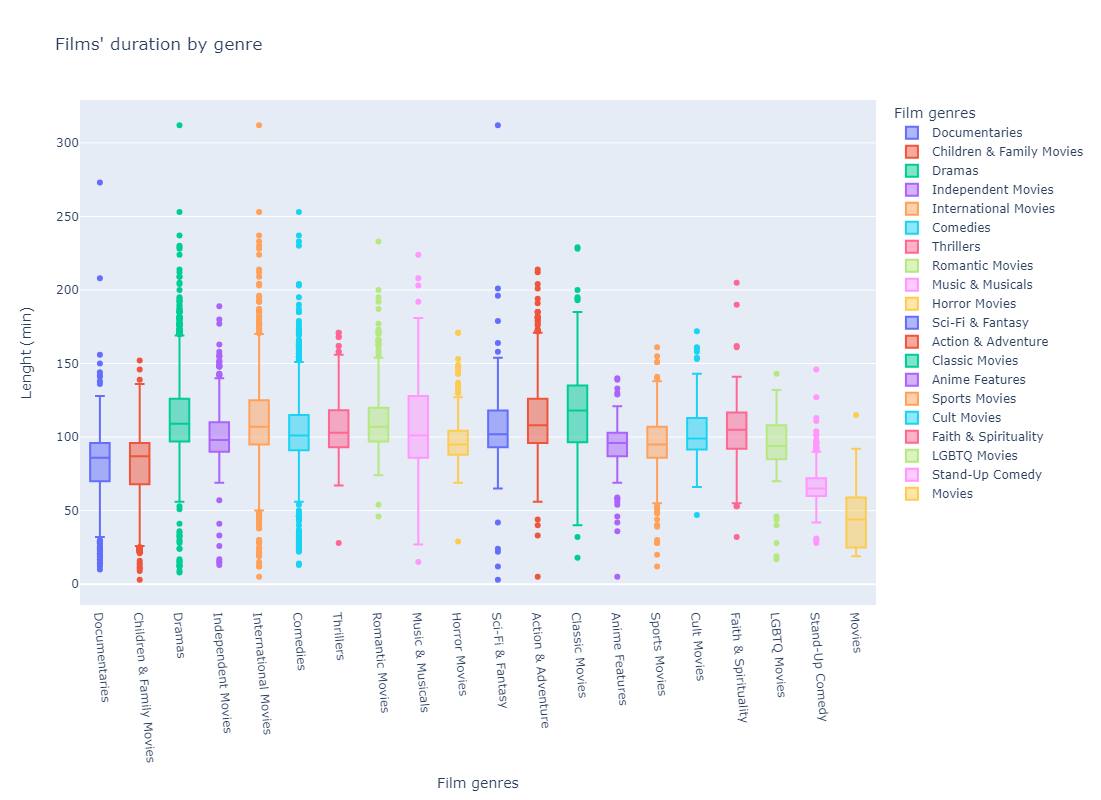

In [34]:
fig7.update_layout(xaxis=dict(tickangle=85))
fig7.show()

In [35]:
# Sample of the Top 20 movies outliers with the shortest duration (the ones with a duration lower than 20 mins) 
low_duration_films = df_netflix_movies[(df_netflix_movies["duration_value"]<=30) & (df_netflix_movies["duration_time_unit"]=="min")] [["type", "title", "genre", 
                                                                                                                                       "duration_value", "duration_time_unit"]]
low_duration_films.sort_values(by=['duration_value'], ascending=True)[:20]

,type,title,genre,duration_value,duration_time_unit
show_id,,,,,
s3778,Movie,Silent,"Children & Family Movies, Sci-Fi & Fantasy",3.0,min
s2714,Movie,Sol Levante,"Action & Adventure, Anime Features, Internatio...",5.0,min
s1485,Movie,Cops and Robbers,Dramas,8.0,min
s1558,Movie,Canvas,"Children & Family Movies, Dramas",9.0,min
s3536,Movie,American Factory: A Conversation with the Obamas,Documentaries,10.0,min
s6406,Movie,Calico Critters: A Town of Dreams,Children & Family Movies,11.0,min
s2859,Movie,Calico Critters: Everyone's Big Dream Flying i...,Children & Family Movies,11.0,min
s3776,Movie,Cosmos Laundromat: First Cycle,"Dramas, International Movies, Sci-Fi & Fantasy",12.0,min
s696,Movie,Besieged Bread,"Dramas, International Movies",12.0,min


In [36]:
# Sample of the Top 20 movies outliers with the largest duratoin (the ones with a duration higher than 2.5 hours) 
high_duration_films = df_netflix_movies[(df_netflix_movies["duration_value"]>=150) & (df_netflix_movies["duration_time_unit"]=="min")] [["type", "title", "genre", 
                                                                                                                                       "duration_value", "duration_time_unit"]]

high_duration_films.sort_values(by=['duration_value'], ascending=False)[:20]

,type,title,genre,duration_value,duration_time_unit
show_id,,,,,
s4254,Movie,Black Mirror: Bandersnatch,"Dramas, International Movies, Sci-Fi & Fantasy",312.0,min
s718,Movie,Headspace: Unwind Your Mind,Documentaries,273.0,min
s2492,Movie,The School of Mischief,"Comedies, Dramas, International Movies",253.0,min
s2488,Movie,No Longer kids,"Comedies, Dramas, International Movies",237.0,min
s2485,Movie,Lock Your Girls In,"Comedies, International Movies, Romantic Movies",233.0,min
s2489,Movie,Raya and Sakina,"Comedies, Dramas, International Movies",230.0,min
s167,Movie,Once Upon a Time in America,"Classic Movies, Dramas",229.0,min
s7933,Movie,Sangam,"Classic Movies, Dramas, International Movies",228.0,min
s1020,Movie,Lagaan,"Dramas, International Movies, Music & Musicals",224.0,min


[Return to: Table of contents](#table_content)